<a href="https://colab.research.google.com/github/TanmayLimje/Machine-Learning/blob/main/MLlab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/datasets/temperatures.csv")

In [4]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [5]:
df.shape

(117, 18)

In [6]:
x = df["YEAR"]
y = df["JAN"]

Text(0.5, 1.0, 'JAN avg temp')

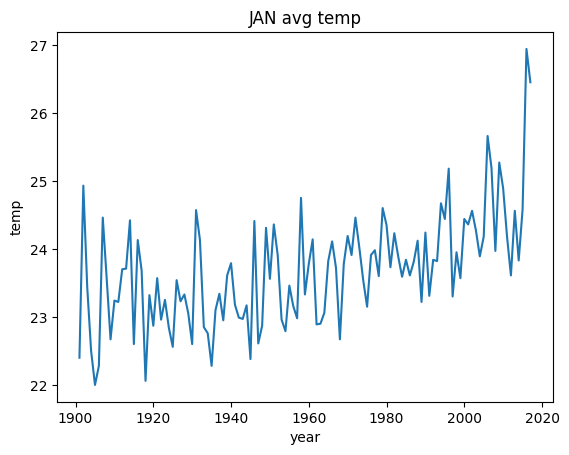

In [7]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xlabel("year")
plt.ylabel("temp")
plt.title("JAN avg temp")


In [11]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [12]:
X=df[["YEAR"]]
Y=df["JAN"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)

(93, 1) (24, 1)


In [13]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_test_lr = lr.predict(X_test)
Y_train_lr = lr.predict(X_train)

In [14]:
print("Intercept",lr.intercept_)
print("Slope",lr.coef_)

Intercept 0.040881962829612206
Slope [0.01206848]


In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [16]:
acc_train_lr = lr.score(X_train, Y_train)
acc_test_lr = lr.score(X_test, Y_test)

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))

Linear Regression: Accuracy on training Data: 0.264
Linear Regression: Accuracy on test Data: 0.460


In [18]:
rmse_train_lr = np.sqrt(mean_squared_error(Y_train, Y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(Y_test, Y_test_lr))

print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)


Linear Regression: The RMSE of the training set is: 0.6660910902332354
Linear Regression: The RMSE of the testing set is: 0.7461610613861774


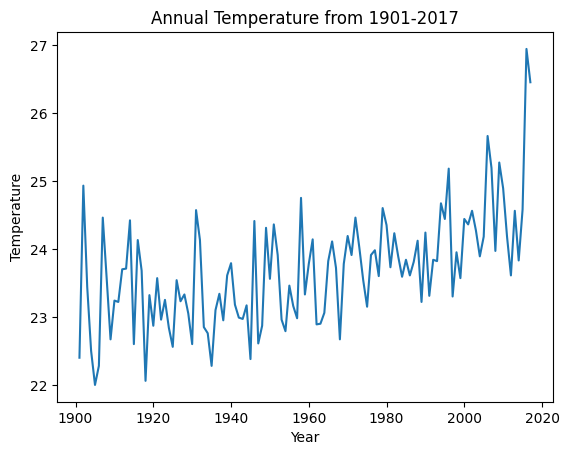

In [19]:
plt.plot(X,Y)
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Annual Temperature from 1901-2017")
plt.show()

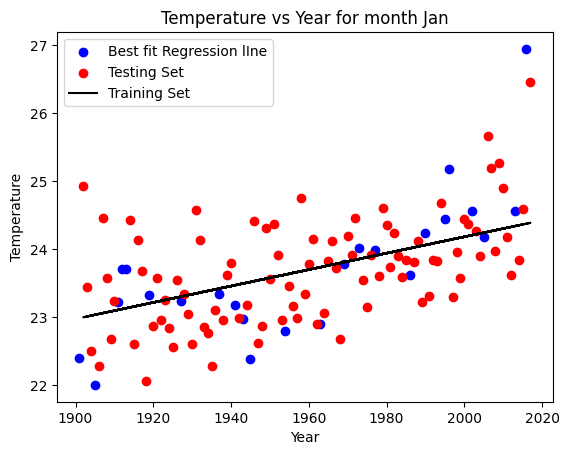

In [20]:
plt.scatter(X_test,Y_test,color = 'blue');
plt.scatter(X_train,Y_train,color = 'red');
plt.plot(X_train,lr.predict(X_train), color = 'black');
plt.legend(['Best fit Regression lIne','Testing Set','Training Set'])
plt.title('Temperature vs Year for month Jan')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show();

In [22]:
print('R-Squared Error :',r2_score(Y_test,Y_test_lr))
print('Mean Absolute Error :',mean_absolute_error(Y_test,Y_test_lr))
print('Mean Squared Error :',mean_squared_error(Y_test,Y_test_lr))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(Y_test,Y_test_lr)))

R-Squared Error : 0.46011716485159526
Mean Absolute Error : 0.5083956669577455
Mean Squared Error : 0.5567563295289469
Root Mean Squared Error : 0.7461610613861774
